In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

/home/shun/.local/share/virtualenvs/analyze-sample-superstore-wG6SCCv0/lib/python3.8/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
df1 = pd.read_excel('SampleSuperStore.xls', sheet_name='注文')
df2 = pd.read_excel('SampleSuperStore.xls', sheet_name='返品')

In [3]:
df = pd.merge(df1, df2, on='オーダー ID', how='left')
df['返品'] = df['返品'].fillna('×')

In [4]:
# 目的変数
y = df['返品']
# 説明変数
train_x = df[df['オーダー日'].dt.year < 2019]
train_x = df[['出荷モード', '顧客区分', '地域', 'カテゴリ', '数量', '割引率']]
train_x_cols_name = ['mode', 'customer_category', 'region', 'category', 'quantity', 'ratio']
# ダミー変数化
train_x = pd.get_dummies(train_x)

In [5]:
# モデル作成
clf = DT(max_depth=3, min_samples_leaf=500)
clf.fit(train_x, y)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=500)

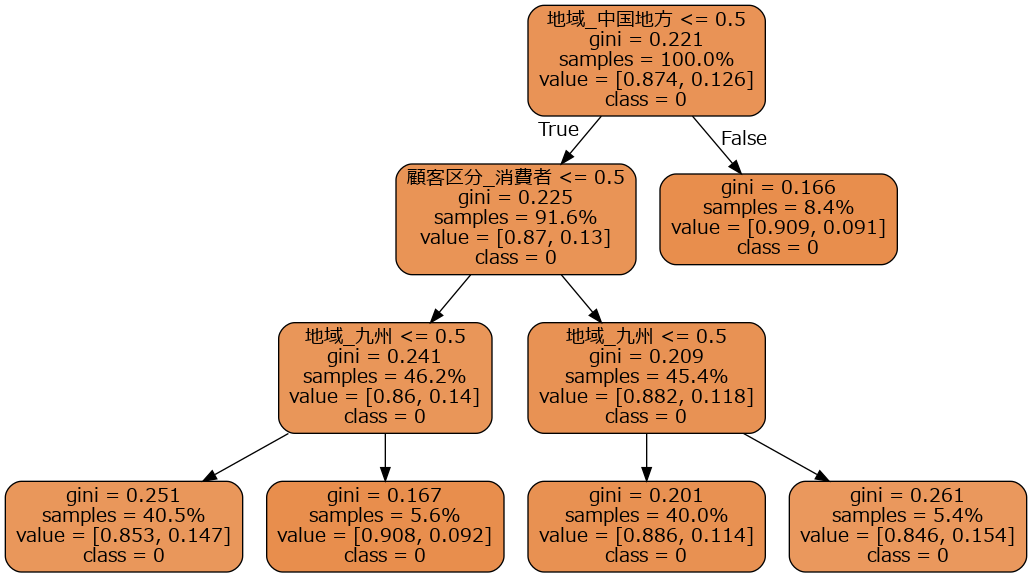

In [6]:
dot_data = export_graphviz(clf, out_file=None, feature_names=train_x.columns, class_names=['0', '1'], filled=True, rounded=True, proportion=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.set_fontname('Meiryo')
for node in graph.get_nodes():
    node.set_fontname('Meiryo')
for e in graph.get_edges():
    e.set_fontname('Meiryo')
Image(graph.create_png())

In [7]:
graph.write_png('./tree_clf.png')

True